# Week 18 Homework
### Introduction to Neural Networks

## 1. What is a neural network? What are the general steps required to build a neural network?

A neural network is a complex predictive model. The models we have worked with up to this point have considered how input features interact with the output feature. Neural network adds a layer of understanding that learns the interactions between input features to better predict real-world outcomes. Generally, to build a neural network, you separate your input features from your output variable by a layer of nodes, or hidden layers. Then you create code to bounce the predictions back and forth from input layer thru hidden layers to output layer over several iterations, or epochs, where the neural network is adding to it's abilities to capture interactions between features with each pass. The final piece is the stopping parameter that you cap the model with.

## 2. Generally, how do you check the performance of a neural network? Why? 

## 3. Create a neural network using keras to predict the outcome of either of these datasets: 
Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone

In [20]:
# Dependencies and modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm

from pprint import pp
from IPython.display import Audio
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, History

# Audible cell-completion notification:
Audio('Bicycle-bell.mp3', autoplay=True)

### Abalone dataset from last class: 
#### Because neural networks can work well on raw data per DataCamp, I'm going to run two datasets thru my modeling. abalone_df will be mostly raw data (except for factorizing the sex column and adding an age column) and the abalone dataframe will have multicollinear features dropped and outliers removed.

In [21]:
# reading in the abalone.data file:
abalone_df = pd.read_csv('abalone.data',header=None, names=['Sex',
                                                            'Length',
                                                            'Diameter',
                                                            'Height',
                                                            'Whole weight',
                                                            'Shucked weight',
                                                            'Viscera weight',
                                                            'Shell weight',
                                                            'Rings',])

# Feature engineering and selection:
abalone_df['Age in years'] = abalone_df['Rings']+1.5


# Factorizing Sex column:
column = ['Sex']
for i in column:
    abalone_df["Coded "+i] = pd.factorize(abalone_df[i])[0]+1
    code_key = pd.DataFrame(abalone_df[i])
    code_key["Code for "+i]=abalone_df["Coded "+i]
    abalone_df = abalone_df.drop(i,axis=1)
    print(code_key[[i,"Code for "+i]].value_counts())

Sex  Code for Sex
M    1               1528
I    3               1342
F    2               1307
dtype: int64


In [23]:
abalone_df.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age in years,Coded Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,10.5,2


In [25]:
#Splitting into input and output features:
X_df = abalone_df.drop('Age in years',axis=1).values
y_df = abalone_df['Age in years'].values

# Split into training and test sets:
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size = 0.33, random_state=42) 
# Examine shape of scrubbed training dataset:
print(X_df.shape, y_df.shape)

(4177, 9) (4177,)


In [26]:
abalone = abalone_df.drop(labels=['Rings','Whole weight', 'Viscera weight', 'Shucked weight'], axis=1)
abalone.head(3)

,Length,Diameter,Height,Shell weight,Age in years,Coded Sex
0,0.455,0.365,0.095,0.15,16.5,1
1,0.350,0.265,0.090,0.07,8.5,1
2,0.530,0.420,0.135,0.21,10.5,2


In [27]:
#Splitting into input and output features:
X = abalone.drop('Age in years',axis=1).values
y = abalone['Age in years'].values

# Split into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)    

# Removing outliers with Isolation Forest:
iso = IsolationForest(contamination=0.1)
# identify outliers with module:
y_pred =iso.fit_predict(X)
# slice for rows that don't have outliers:
mask = y_pred != -1
X, y = X[mask, :], y[mask]
# Examine shape of scrubbed training dataset:
print(X.shape, y.shape)

(3759, 5) (3759,)


### Creating the keras neural network:

In [31]:
# Finding number of input features:
n_cols = X_df.shape[1]
n_cols

9

In [32]:
# defining my predictors:
n_cols = X_df.shape[1]
model = Sequential()

model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

## 4. Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.

## 5. Create a neural network using pytorch to predict the same result as question 3. 

## 6. Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?

# DataCamp Completion:

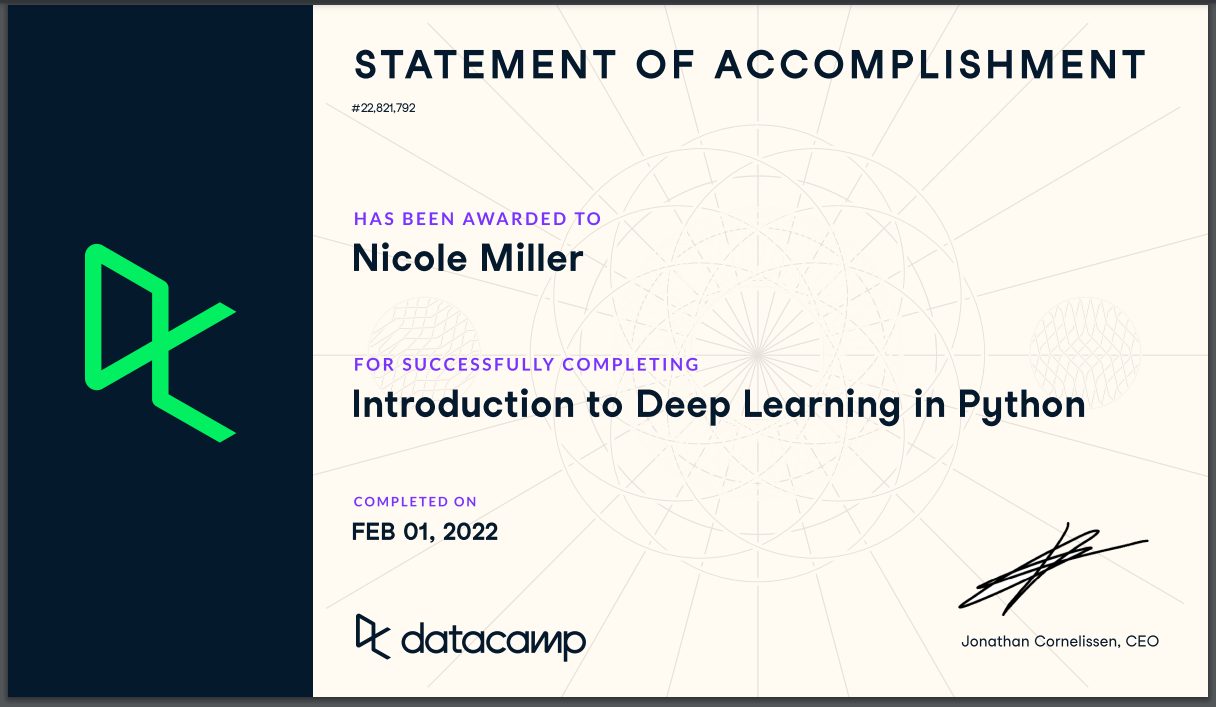